# **Python Capstone Project – Marketing Campaign Performance**

**github link:**

**Project Steps and Objectives:**

**1) Load the Dataset**

➢ Read the marketing campaign data from the CSV file into a pandas DataFrame.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")

# Load dataset
url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"
df = pd.read_csv(url)




**2) Descriptive Analysis**

**Basic Structure:**




➢ Print the first few rows of the dataset to get an overview of the data.


In [42]:
# head
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023



➢ Obtain the number of rows and columns in the dataset.


In [3]:
# Shape
df.shape


(22029, 16)

➢ Get a concise summary of the dataset, including the data types and non-null values.


In [4]:

# Dataset info
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

➢ Generate descriptive statistics for numerical columns.

In [5]:
# Descriptive statistics
df.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000
mean,11015.000000,4.757232,5522.740842,182.863648,2223.807572,50610.402787,6.582323
std,6359.368876,0.960393,2597.666260,301.619721,1394.166380,28542.979123,1.458804
min,1.000000,2.015723,1000.000000,-98.300000,30.000000,1001.000000,4.000000
25%,5508.000000,4.130705,3286.000000,-4.080000,1067.000000,25804.000000,5.000000
50%,11015.000000,4.761527,5525.000000,93.650000,2088.000000,50858.000000,7.000000
75%,16522.000000,5.429335,7766.000000,247.310000,3212.000000,75165.000000,8.000000
max,22029.000000,7.469907,9999.000000,3109.790000,6887.000000,99999.000000,9.000000


**Data Exploration:**


➢ Print the number of unique Campaign_ID values in the dataset.


In [6]:
# Unique Campaign IDs
df['Campaign_ID'].nunique()


22029

➢ List the unique values of the Location and Customer_Segment columns.


In [7]:
# Unique locations & customer segments
df['Location'].unique()
df['Customer_Segment'].unique()


array(['Tech Enthusiasts', 'Foodies', 'Fashionistas',
       'Outdoor Adventurers', 'Health & Wellness'], dtype=object)

➢ Count the occurrences of each category in the Campaign_Type and
Channel_Used and columns.

In [11]:
# Count of Campaign Types
df['Channel_Used'].value_counts()


,count
Channel_Used,
Facebook,3742
Google Ads,3694
Website,3688
Instagram,3649
YouTube,3632
Email,3624


In [12]:
# Count of Channels Used
df['Channel_Used'].value_counts()


,count
Channel_Used,
Facebook,3742
Google Ads,3694
Website,3688
Instagram,3649
YouTube,3632
Email,3624


**3) Exploratory Data Analysis (EDA) and Visualization**

**Campaign Performance:**

➢ Plot a scatter plot to visualize the relationship between Acquisition_Cost and ROI.

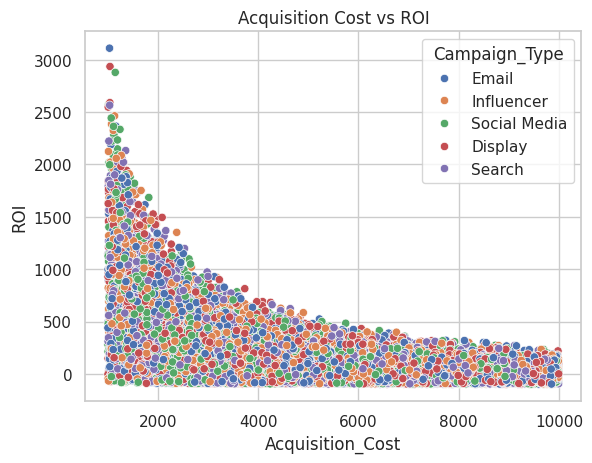

In [13]:
plt.figure()
sns.scatterplot(data=df, x='Acquisition_Cost', y='ROI', hue='Campaign_Type')
plt.title("Acquisition Cost vs ROI")
plt.show()


➢ Create a bar chart to visualize the average Conversion_Rate for different Channel_Used, categorized by Campaign_Type.

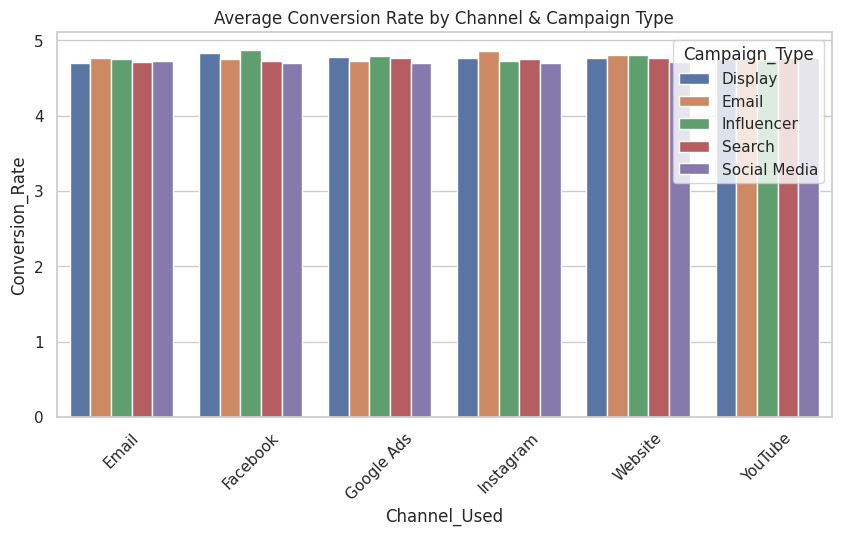

In [16]:
avg_conv = df.groupby(['Channel_Used', 'Campaign_Type'])['Conversion_Rate'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=avg_conv, x='Channel_Used', y='Conversion_Rate', hue='Campaign_Type')
plt.title("Average Conversion Rate by Channel & Campaign Type")
plt.xticks(rotation=45)
plt.show()


➢ Visualize the distribution of Engagement_Score across different Campaign_Type using a box plot.

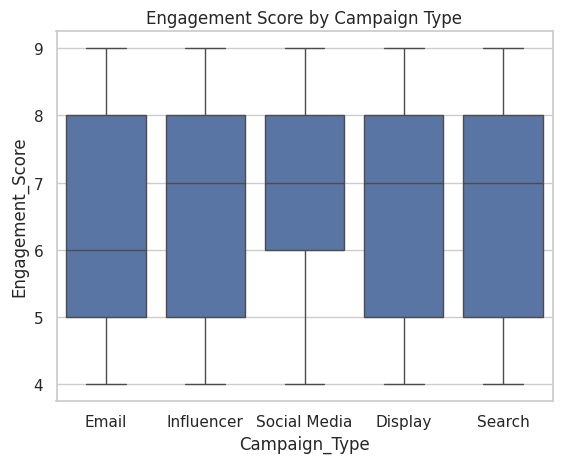

In [17]:
plt.figure()
sns.boxplot(data=df, x='Campaign_Type', y='Engagement_Score')
plt.title("Engagement Score by Campaign Type")
plt.show()


➢ Analyze the average ROI by Company using a bar chart to compare the profitability of campaigns conducted by different companies.

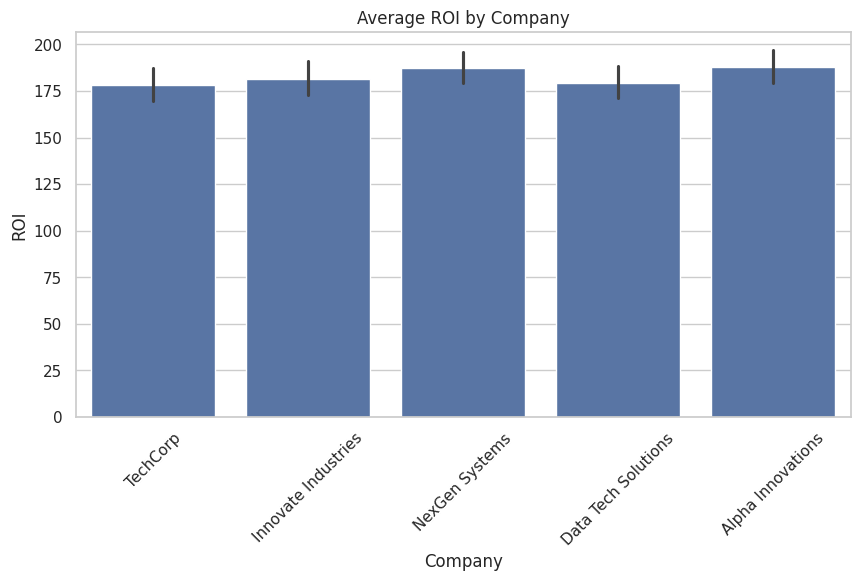

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Company', y='ROI')
plt.title("Average ROI by Company")
plt.xticks(rotation=45)
plt.show()


➢ Examine the correlation between Engagement_Score and Conversion_Rate
using a heatmap.

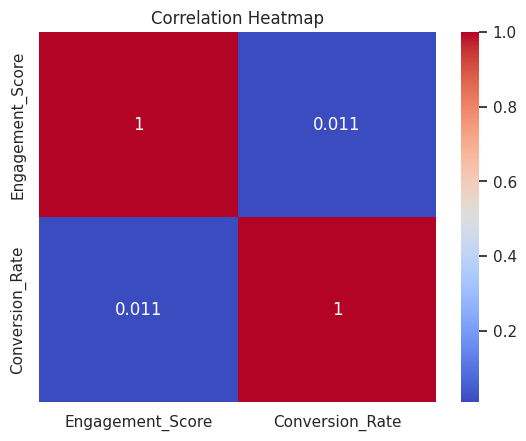

In [19]:
corr = df[['Engagement_Score', 'Conversion_Rate']].corr()

plt.figure()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**Customer Segmentation:**

➢ Create a count plot to visualize the distribution of Target_Audience.

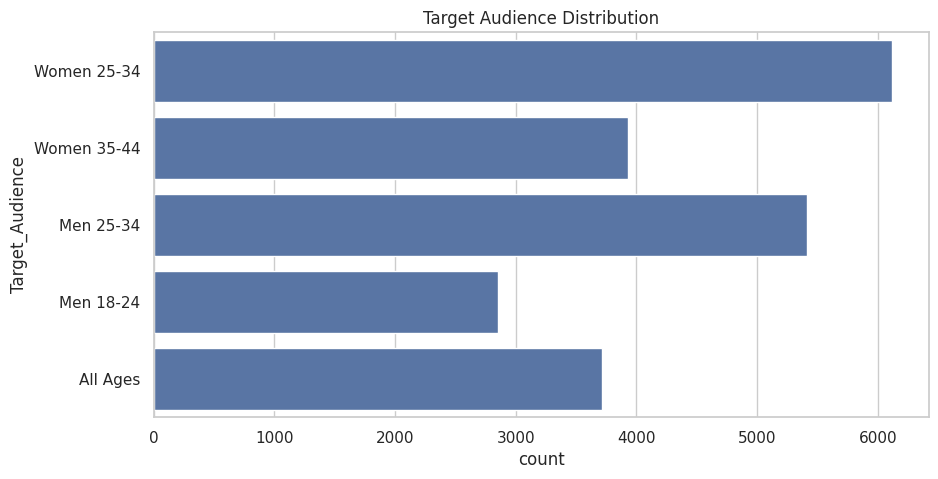

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Target_Audience')
plt.title("Target Audience Distribution")
plt.show()


➢ Identify which Customer_Segment has the highest Conversion_Rate for each Language using a bar chart.

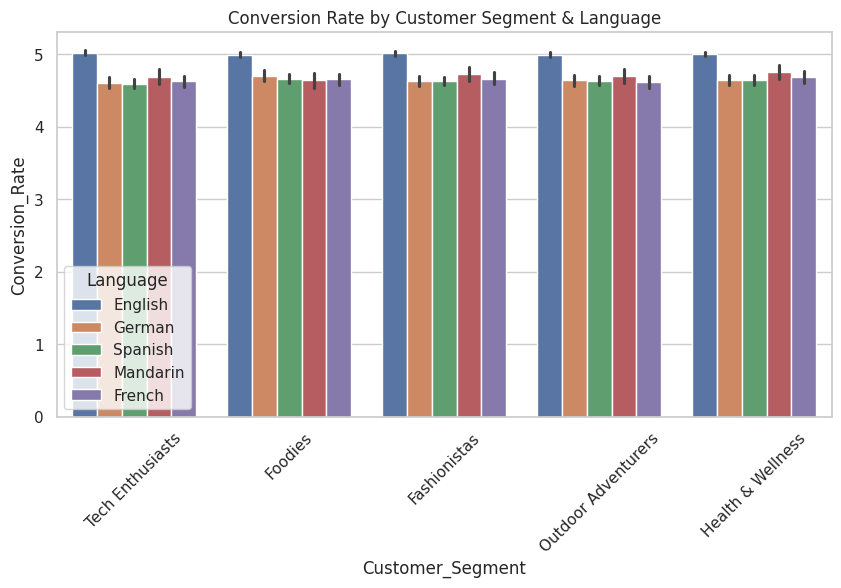

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Customer_Segment', y='Conversion_Rate', hue='Language')
plt.title("Conversion Rate by Customer Segment & Language")
plt.xticks(rotation=45)
plt.show()


➢ Visualize the distribution of Acquisition_Cost across each Customer_Segment, categorized by Channel_Used, using a box plot.

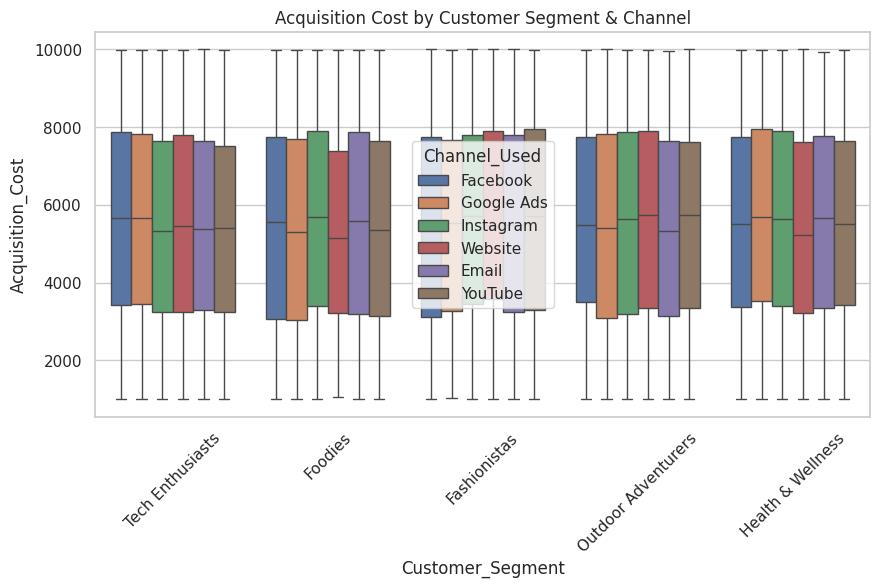

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Customer_Segment', y='Acquisition_Cost', hue='Channel_Used')
plt.title("Acquisition Cost by Customer Segment & Channel")
plt.xticks(rotation=45)
plt.show()


➢ Analyze average Conversion_Rate by Language using a bar chart to compare the effectiveness of campaigns conducted in different languages.

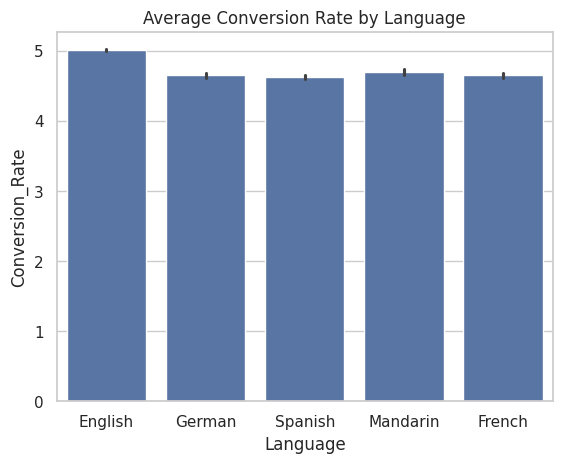

In [24]:
plt.figure()
sns.barplot(data=df, x='Language', y='Conversion_Rate')
plt.title("Average Conversion Rate by Language")
plt.show()


**Channel Effectiveness:**

➢ Compare the Engagement_Score for different Channels_Used, segmented by Campaign_Type, using a bar chart.

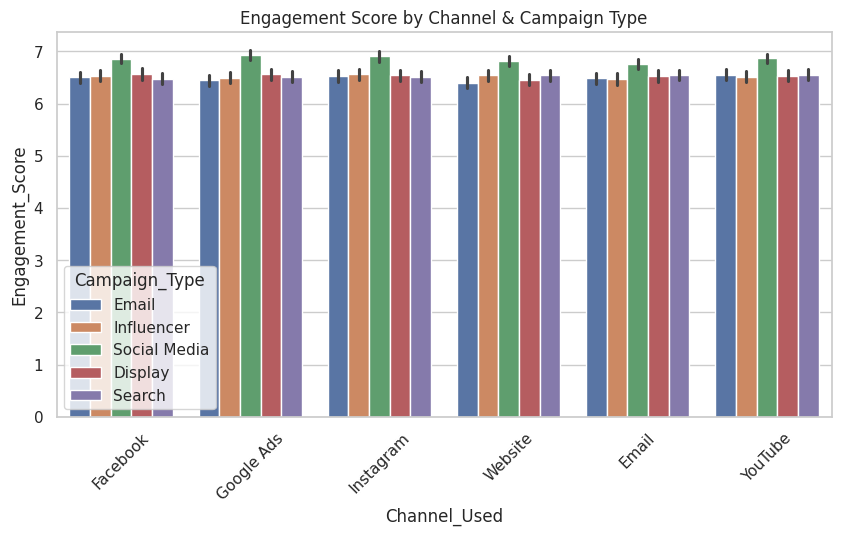

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Channel_Used', y='Engagement_Score', hue='Campaign_Type')
plt.title("Engagement Score by Channel & Campaign Type")
plt.xticks(rotation=45)
plt.show()


➢ Show the distribution of total ROI across different Channels_Used using a pie chart.

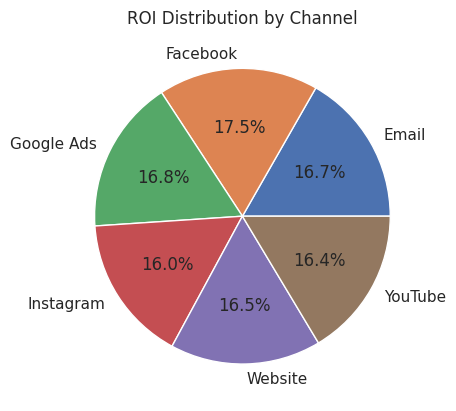

In [28]:
roi_channel = df.groupby('Channel_Used')['ROI'].sum()

plt.figure()
roi_channel.plot(kind='pie', autopct='%1.1f%%')
plt.title("ROI Distribution by Channel")
plt.ylabel("")
plt.show()


➢ Plot a scatter plot to show the relationship between Clicks and Impressions
for each Channel_Used.

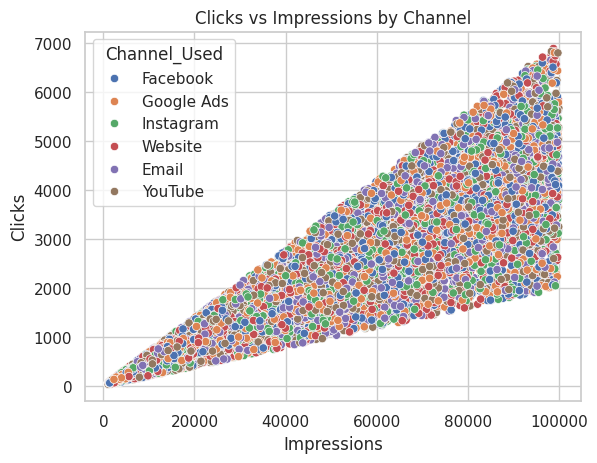

In [29]:
plt.figure()
sns.scatterplot(data=df, x='Impressions', y='Clicks', hue='Channel_Used')
plt.title("Clicks vs Impressions by Channel")
plt.show()


**Time-Based Analysis:**

➢ Plot the distribution of Duration using a histogram.

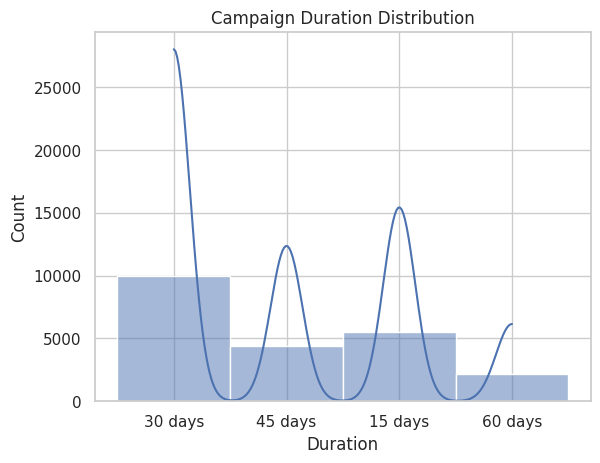

In [30]:
plt.figure()
sns.histplot(df['Duration'], bins=20, kde=True)
plt.title("Campaign Duration Distribution")
plt.show()


➢ Analyze how the overall Conversion_Rate has changed over Date for each
Company using a line chart.

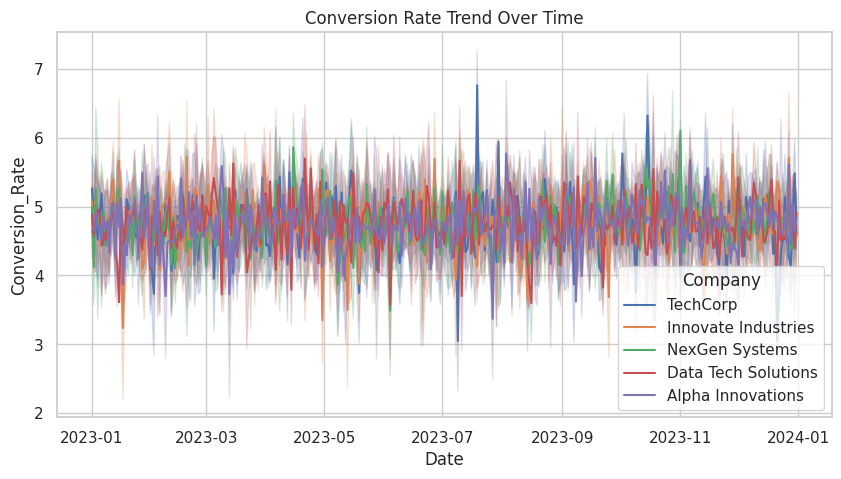

In [35]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date'].head()
df['Date'].dtype

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='Conversion_Rate', hue='Company')
plt.title("Conversion Rate Trend Over Time")
plt.show()




➢ Examine the trend of Engagement_Score over Date with a line chart.

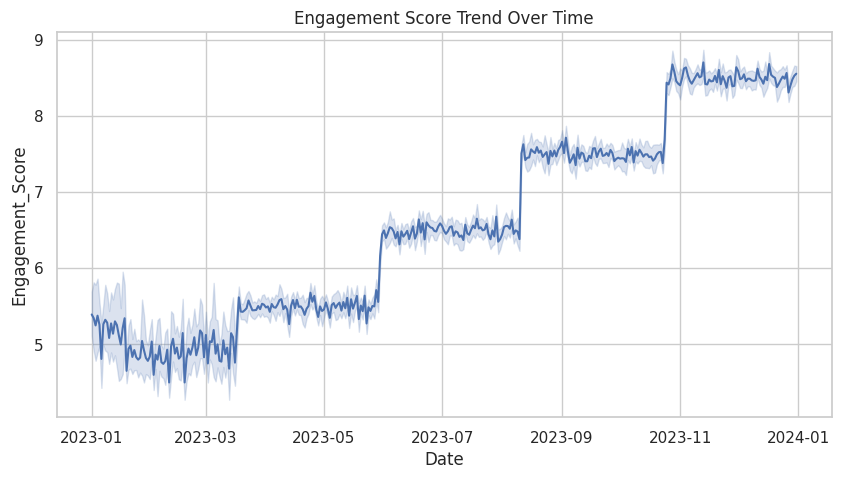

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='Engagement_Score')
plt.title("Engagement Score Trend Over Time")
plt.show()


**Geographic Analysis:**

➢ Determine which location has the highest Acquisition_Cost using a bar chart.

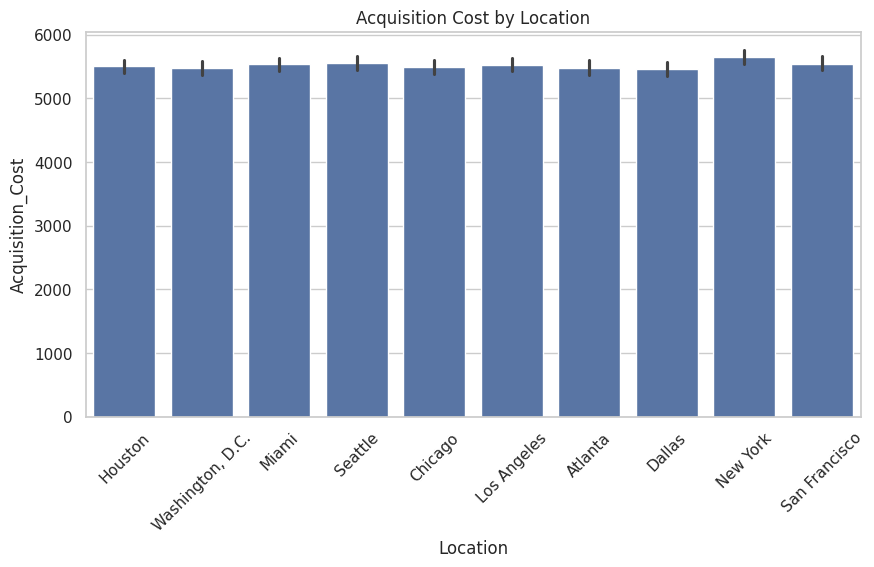

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Location', y='Acquisition_Cost')
plt.title("Acquisition Cost by Location")
plt.xticks(rotation=45)
plt.show()


➢ Visualize the Conversion_Rate by different Location, categorized by
Target_Audience, using a bar chart.

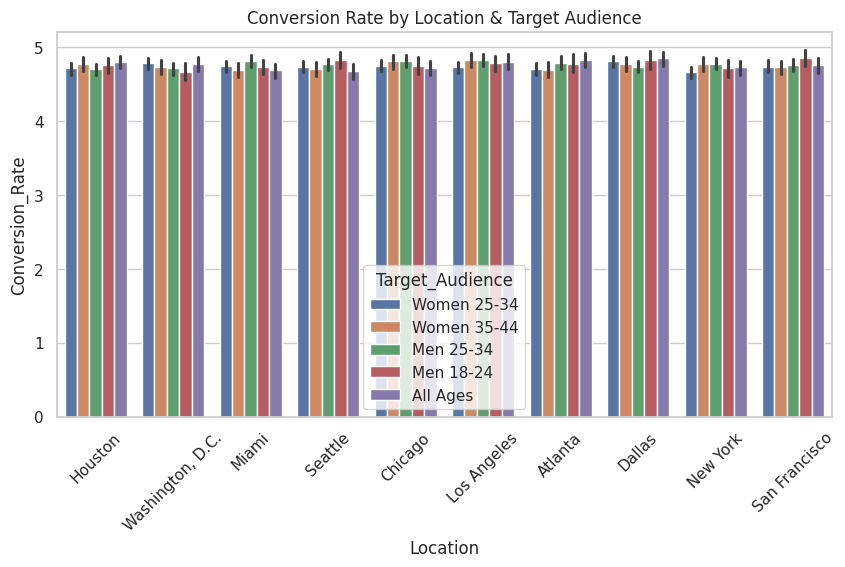

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Location', y='Conversion_Rate', hue='Target_Audience')
plt.title("Conversion Rate by Location & Target Audience")
plt.xticks(rotation=45)
plt.show()


➢ Illustrate the proportion of ROI by Location using a pie chart.

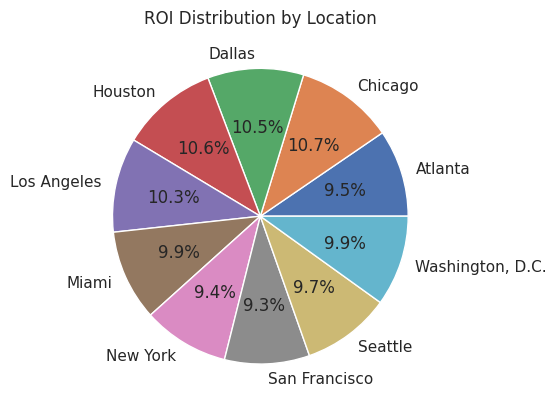

In [38]:
roi_location = df.groupby('Location')['ROI'].sum()

plt.figure()
roi_location.plot(kind='pie', autopct='%1.1f%%')
plt.title("ROI Distribution by Location")
plt.ylabel("")
plt.show()
